# Assignment 2

In this assigment, we will work with the *Adult* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult). Extract the data files into the subdirectory: `../05_src/data/adult/` (relative to `./05_src/`).

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../05_src/data/adult/`, then you can use the code below to load them.

In [1]:
# Import pandas library to use dataframe 
import pandas as pd

# Assign features to variable name "columns": 
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
]


# Read into the "adult.data" file, filter to people with income >50K, and assign to dataframe "adult_dt"
# The code below filters assigns 'income >=50K' the value of "1", and others the value of "0".
adult_dt = (pd.read_csv('../../05_src/data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1)) 



In [2]:
# MY CODE BELOW: 
# From LS's instruction in Slack, we are supposed to load "dask", "logger", and "parquet" at the beginning of all notebooks including the assignments. See below. 

%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)



In [3]:
# (CONT.)

import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_2292\3352321389.py:3: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be 

# Get X and Y

Create the features data frame and target data:

+ Create a dataframe `X` that holds the features (all columns that are not `income`).
+ Create a dataframe `Y` that holds the target data (`income`).
+ From `X` and `Y`, obtain the training and testing data sets:

    - Use a train-test split of 70-30%. 
    - Set the random state of the splitting function to 42.

In [4]:
# MY CODE BELOW 

# Import Sklearn library for training/test sets: 
from sklearn.model_selection import train_test_split

# Define Features and Target Variable
X = adult_dt.drop(columns=['income'])  # Features
Y = adult_dt['income']  # Target

# Perform train-test split of 70%-30%, setting random state 42 for reproducibility 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (22792, 14)
X_test shape: (9769, 14)
Y_train shape: (22792,)
Y_test shape: (9769,)


## Random States

Please comment: 

+ What is the [random state](https://scikit-learn.org/stable/glossary.html#term-random_state) of the [splitting function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)? 
+ Why is it [useful](https://en.wikipedia.org/wiki/Reproducibility)?

*MY ANSWER:*

- Random State of the Splitting function (in our case, the value is set to 42) is a parameter that controls the shuffling and splitting of the data before applying the split. 
- We can set any number for the parameter - in our case, we set it to 42. 
- It is useful for reproducibility. 



# Preprocessing

Create a [Column Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) that treats the features as follows:

- Numerical variables

    * Apply [KNN-based imputation for completing missing values](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html):
        
        + Consider the 7 nearest neighbours.
        + Weight each neighbour by the inverse of its distance, causing closer neigbours to have more influence than more distant ones.
    * [Scale features using statistics that are robust to outliers](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler).

- Categorical variables: 
    
    * Apply a [simple imputation strategy](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer):

        + Use the most frequent value to complete missing values, also called the *mode*.

    * Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):
        
        + Handle unknown labels if they exist.
        + Drop one column for binary variables.
    
    
The column transformer should look like this:

![](./images/assignment_2__column_transformer.png)

In [5]:
# MY CODE BELOW: 

# Import Column Transformer, KNNImputer, SimpleImputer, RobustScaler, and OneHot Encoder 
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder




In [6]:
# Before doing anything further: I want a basic understanding / overview of my dataset. See codes below. 

# Load the data "adult.data" ("DATA TYPE" file format) into csv using pandas library 
adult_data = pd.read_csv('../../05_src/data/adult/adult.data', header=None, names=columns)

# Display basic information about the DataFrame
adult_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Double-check for null values
print(adult_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


*OBSERVATION*: 
- No NULL values 
- Need to clarify what Feature 'fnlwgt' is for. It looks like some ids but we're not sure what these ids or numerical values represent. 
- We will need to convert some 'object' features to numerical values before applying the ML model. 

In [8]:
# Display the first few rows of the DataFrame for an overview:
adult_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Describe some basic statistics: 
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


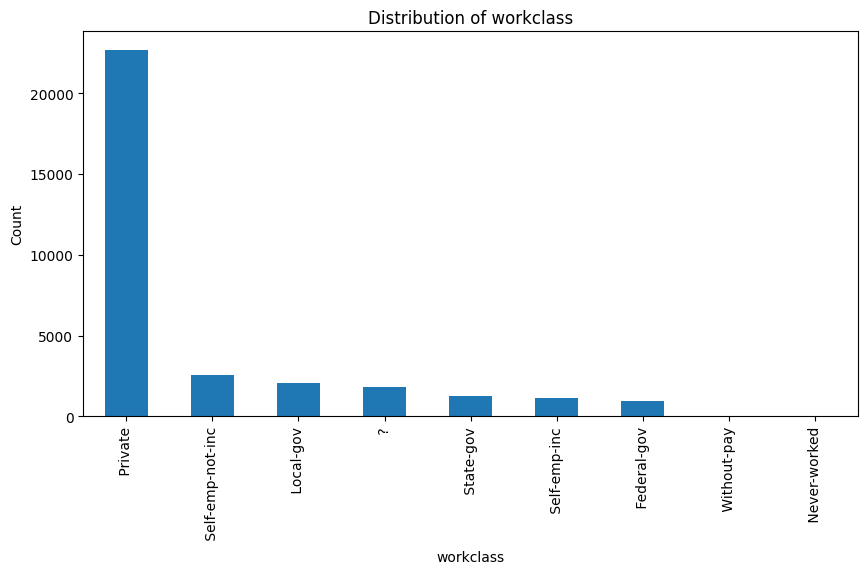

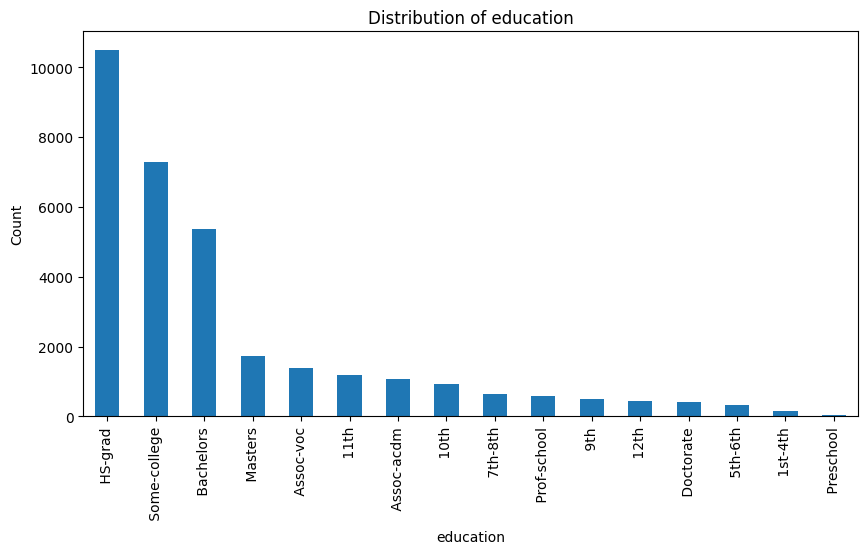

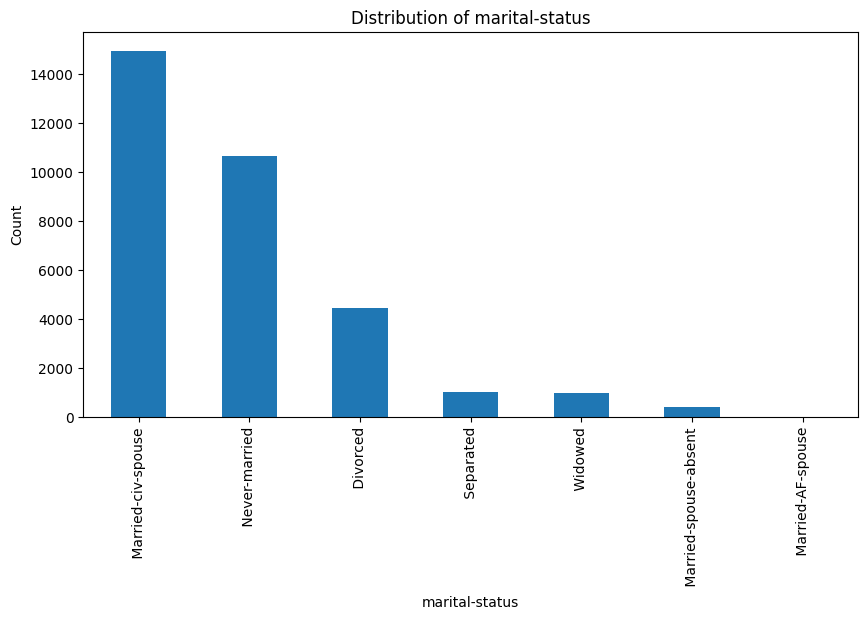

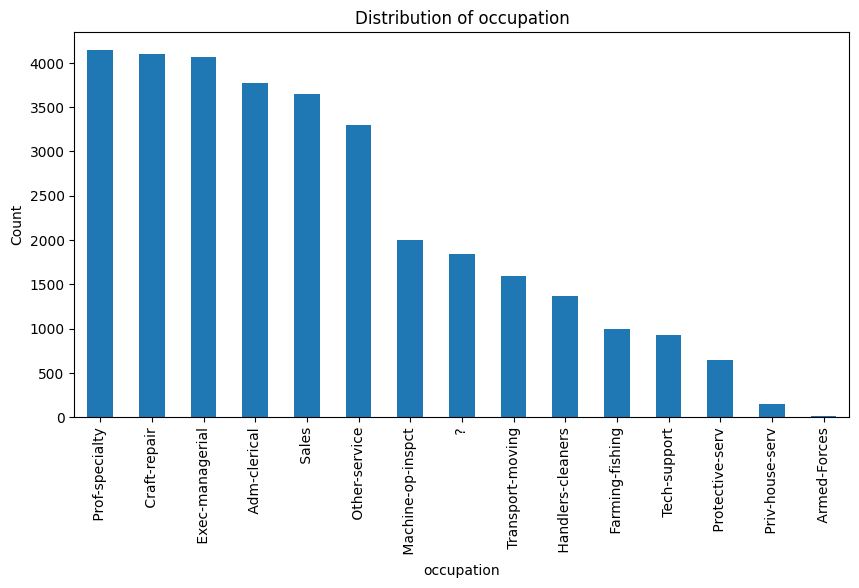

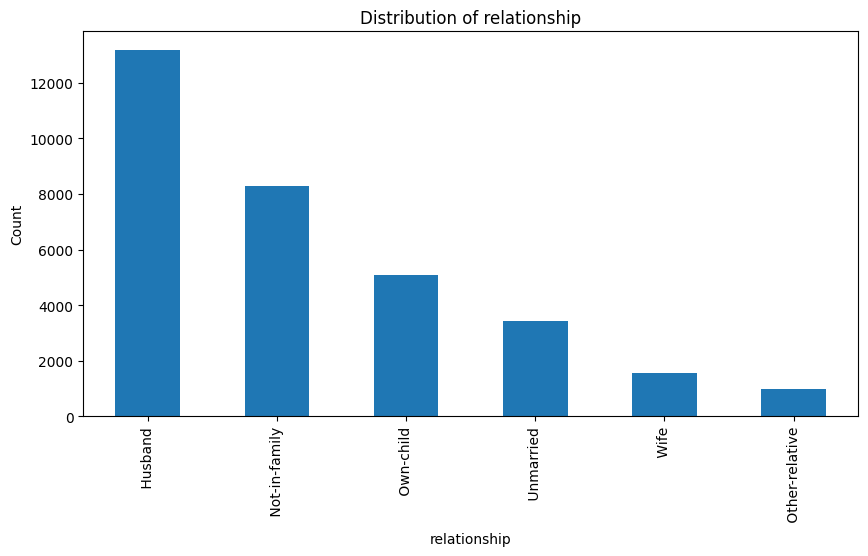

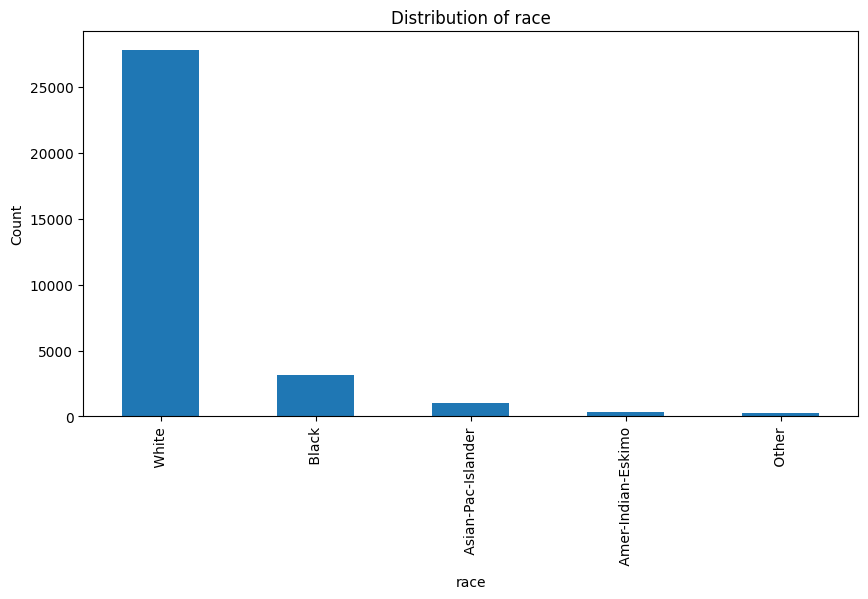

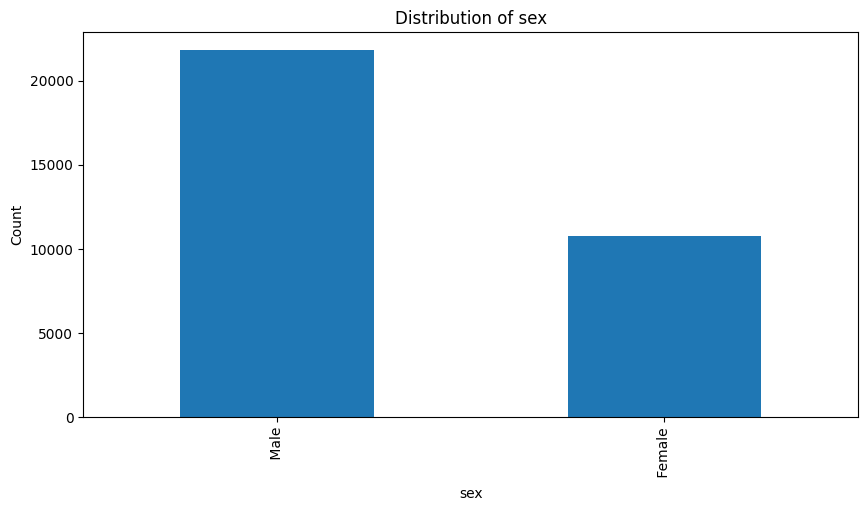

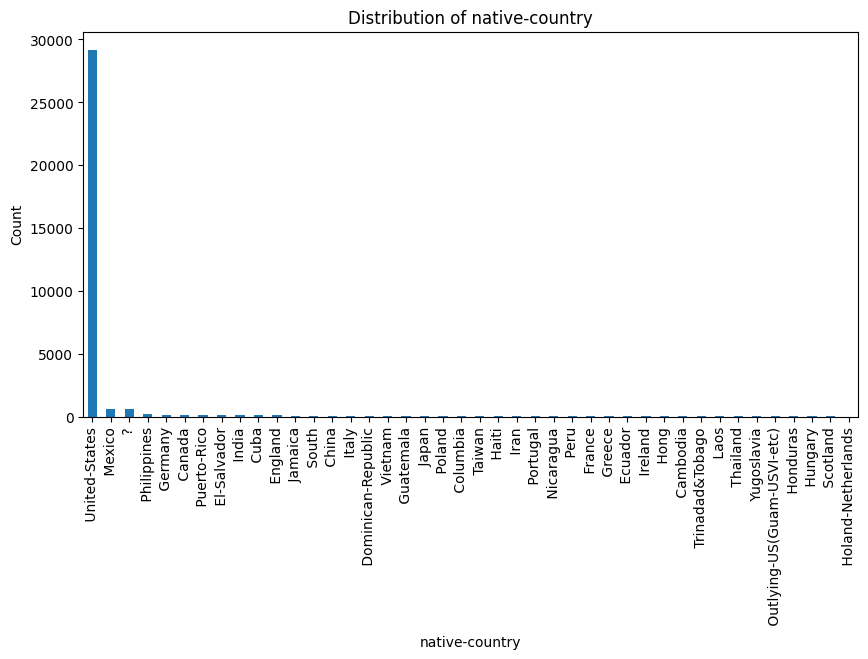

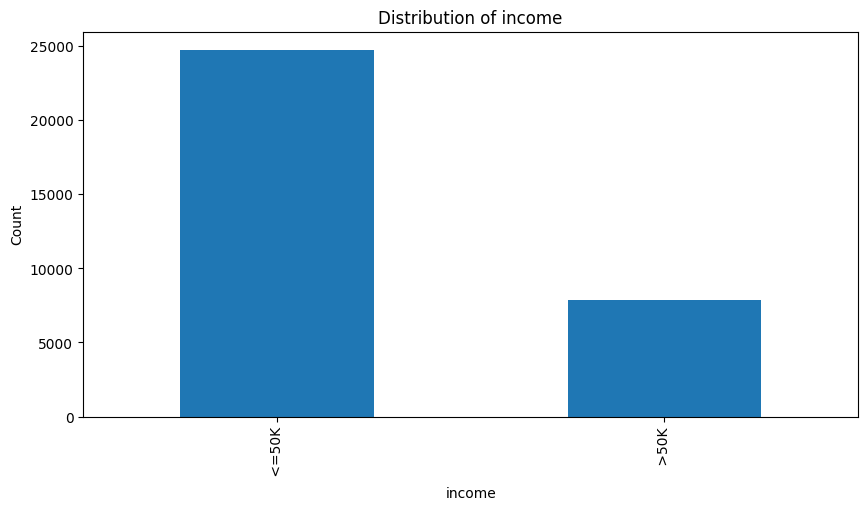

In [10]:
# Exploratory statistics for all categorical values; 

# Import matplot
import matplotlib.pyplot as plt

# Assign 'categorical_features': 
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Define function to plot them all as bar chart
for x in categorical_features:
    plt.figure(figsize=(10, 5))  # Set the size of each plot
    adult_data[x].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {x}')
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()


*OBSERVATION:* 
- Significant class imbalance, where a large majority of observation is the group of: white men, in United States, married, highest education is high-school diploma, with income <=50K.  
- Therefore class imbalance is something we might want to handle for future studies.

In [14]:
# DATA PRE-PROCESSING / FEATURE-ENGINEERING: 

# Define the column lists
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# "categorical_features" have been defined earlier.  

# DEFINE THE COLUMN TRANSFORMER:
# Import the necessary libraries: 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline  # Import Pipeline if you haven't already


# Numerical features transformation: KNN imputation with n=7, inverse distance weight, and Robust Scaler (robust to outliers)
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7, weights='distance')), 
    ('scaler', RobustScaler())
])

# Categorical features transformation: 'Simple imputation, with 'mode' (most frequent value) for missing values,  'one hot encoder' for unknown labels, drop column for binary variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combine the 2 transformations above in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, make_column_selector(dtype_include=['int64', 'float64'])),
        ('cat', categorical_transformer, make_column_selector(dtype_include='object'))
    ]
)

# Display the "preprocessor" to verify its structure
preprocessor



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000013C2675B790>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000013C266FC2B0>)])

## Model Pipeline

Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `classifier` and assign a [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to it.

The pipeline looks like this:

![](./images/assignment_2__pipeline.png)

In [15]:
# MY CODE BELOW. 

# Import necessary libraries:
from sklearn.ensemble import RandomForestClassifier

# Create the Model Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),            # Add the 'preprocessing' step, assigning the Column Transformer "preprocessor" from the previous secion.
    ('classifier', RandomForestClassifier())    # Add the 'classifier' step, assigning RandomForestClassifier() to it. 
])

# Display the pipeline to verify its structure
pipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=7,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013C2675B790>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013C266FC2B0>)])),
                ('classifier', RandomForestClassifier())])

# Cross-Validation

Evaluate the model pipeline using [`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html):

+ Measure the following [preformance metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values): negative log loss, ROC AUC, accuracy, and balanced accuracy.
+ Report the training and validation results. 
+ Use five folds.


In [16]:
# Import the necessary library
from sklearn.model_selection import cross_validate

# Define the performance metrics list: 
scoring_list = ['neg_log_loss','roc_auc','accuracy','balanced_accuracy'] 

# Apply the model with cross-validation 
cv_result = cross_validate(pipeline, X, Y, cv=5, scoring = scoring_list, return_train_score = True)

c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [18]:
# MANUALLY DISPLAY THE RESULTS WITHOUT USING PANDAS: 

''' 
Note: Here, for each scoring metric, we divide the sum of value by the number of folds. 
We could just divide by "5" (the defined number of folds) for simplicity. But, for sustainability, we will use "len()" to calculate the number of folds
 - in case we do change this value in the future.

'''

# Calculate average TRAINING scores across folds
train_neg_log_loss_avg = sum(cv_result['train_neg_log_loss']) / len(cv_result['train_neg_log_loss'])
train_roc_auc_avg = sum(cv_result['train_roc_auc']) / len(cv_result['train_roc_auc'])
train_accuracy_avg = sum(cv_result['train_accuracy']) / len(cv_result['train_accuracy'])
train_balanced_accuracy_avg = sum(cv_result['train_balanced_accuracy']) / len(cv_result['train_balanced_accuracy'])

# Calculate average VALIDATION scores across folds
valid_neg_log_loss_avg = sum(cv_result['test_neg_log_loss']) / len(cv_result['test_neg_log_loss'])
valid_roc_auc_avg = sum(cv_result['test_roc_auc']) / len(cv_result['test_roc_auc'])
valid_accuracy_avg = sum(cv_result['test_accuracy']) / len(cv_result['test_accuracy'])
valid_balanced_accuracy_avg = sum(cv_result['test_balanced_accuracy']) / len(cv_result['test_balanced_accuracy'])

# Print the results for TRAINING and VALIDATION (aka. validation) scores
print("TRAINING SCORES (average across folds):")
print(f"Negative Log Loss: {train_neg_log_loss_avg}")
print(f"ROC AUC: {train_roc_auc_avg}")
print(f"Accuracy: {train_accuracy_avg}")
print(f"Balanced Accuracy: {train_balanced_accuracy_avg}")

print("\nVALIDATION SCORES (average across folds):")
print(f"Negative Log Loss: {valid_neg_log_loss_avg}")
print(f"ROC AUC: {valid_roc_auc_avg}")
print(f"Accuracy: {valid_accuracy_avg}")
print(f"Balanced Accuracy: {valid_balanced_accuracy_avg}")



TRAINING SCORES (average across folds):
Negative Log Loss: -0.08069594102769925
ROC AUC: 0.9999999717861587
Accuracy: 0.9999462542502823
Balanced Accuracy: 0.9998992877253908

VALIDATION SCORES (average across folds):
Negative Log Loss: -0.38884296020538345
ROC AUC: 0.9012315202447798
Accuracy: 0.8537821540815553
Balanced Accuracy: 0.7746471358364578


Display the fold-level results as a pandas data frame and sorted by negative log loss of the test (validation) set.

In [22]:
# MY CODE BELOW: 

# CHANGE TO PANDAS DATAFRAME: 
cv_result_pd = pd.DataFrame(cv_result)

# Rename columns for clarity - change "test" to "validation"
cv_result_pd = cv_result_pd.rename(columns={
    'train_neg_log_loss': 'train_log_loss',
    'test_neg_log_loss': 'validation_log_loss',       # Renamed for clarity
    'train_roc_auc': 'train_roc_auc',
    'test_roc_auc': 'validation_roc_auc',             # Renamed for clarity
    'train_accuracy': 'train_accuracy',
    'test_accuracy': 'validation_accuracy',           # Renamed for clarity
    'train_balanced_accuracy': 'train_balanced_accuracy',
    'test_balanced_accuracy': 'validation_balanced_accuracy'  # Renamed for clarity
})


# Sort by validation log loss in ascending order
cv_result_pd = cv_result_pd.sort_values(by='validation_log_loss', ascending=True)

# Display the sorted DataFrame
print("Scores sorted by NEGATIVE LOG LOSS of the VALIDATION set ('validation_log_loss'):")
cv_result_pd


Scores sorted by NEGATIVE LOG LOSS of the VALIDATION set ('validation_log_loss'):


,fit_time,score_time,validation_log_loss,train_log_loss,validation_roc_auc,train_roc_auc,validation_accuracy,train_accuracy,validation_balanced_accuracy,train_balanced_accuracy
1,12.100499,0.228437,-0.413554,-0.080431,0.894131,1.0,0.848587,0.999923,0.767023,0.999841
3,12.483297,0.209046,-0.393509,-0.080951,0.900360,1.0,0.857033,1.000000,0.774981,1.000000
0,11.997962,0.206453,-0.386466,-0.080304,0.899999,1.0,0.853063,0.999885,0.770298,0.999761
2,12.210201,0.209222,-0.376829,-0.080595,0.903633,1.0,0.852119,0.999962,0.778712,0.999975
4,11.916290,0.210346,-0.373857,-0.081198,0.908035,1.0,0.858108,0.999962,0.782221,0.999920


Calculate the mean of each metric. 

In [23]:
# MY CODE BELOW: 

# Calculate the mean of each metric
print("\nMEAN of each performance metrics across 5 cv folds - Training set (train & validation):")
print(cv_result_pd.mean())




MEAN of each performance metrics across 5 cv folds - Training set (train & validation):
fit_time                        12.141650
score_time                       0.212701
validation_log_loss             -0.388843
train_log_loss                  -0.080696
validation_roc_auc               0.901232
train_roc_auc                    1.000000
validation_accuracy              0.853782
train_accuracy                   0.999946
validation_balanced_accuracy     0.774647
train_balanced_accuracy          0.999899
dtype: float64


Calculate the same performance metrics (negative log loss, ROC AUC, accuracy, and balanced accuracy) using the testing data `X_test` and `Y_test`. Display results as a dictionary.

*Tip*: both, `roc_auc()` and `neg_log_loss()` will require prediction scores from `pipe.predict_proba()`. However, for `roc_auc()` you should only pass the last column `Y_pred_proba[:, 1]`. Use `Y_pred_proba` with `neg_log_loss()`.

In [24]:
# Import the performance metrics from sklearn
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, balanced_accuracy_score

# Fit the pipeline on the entire TRAINING set
pipeline.fit(X_train, Y_train)

# Generate predictions on the TEST set
Y_pred_proba = pipeline.predict_proba(X_test)   # PROBABILITY predictions "Y_pred_proba" for roc_auc() and neg_log_loss() scores.
Y_pred = pipeline.predict(X_test)               # CLASS predictions "Y_pred" for 'accuracy' and 'balance accuracy' 

# Calculate performance metrics on the TEST set
test_metrics = {
    'neg_log_loss': -log_loss(Y_test, Y_pred_proba),                # Use "Y_pred_proba" probability predictions with negative log loss function. "Log Loss" itself measures how our predictions are (e.g., predicting with 90% confidence that the test data point is "Income >50K" and it actually is that (100%), giving log loss of 0.1). Negative Log Loss just flips it around for easy interpretation: the higher the score the better.
    'roc_auc': roc_auc_score(Y_test, Y_pred_proba[:, 1]),           # Use "Y_pred_proba[:, 1]" for 'roc auc score'. It tells ROC AUC to look at all rows (colon), second column ("1", for Class 1), and asks ROC AUC how confident it is that a particular data point is for Income class 1 (e.g., Income >50K) 
    'accuracy': accuracy_score(Y_test, Y_pred),                     # Accuracy: measures how often the model accurately predicts the class label. 
    'balanced_accuracy': balanced_accuracy_score(Y_test, Y_pred)    # Balanced accuracy - an alternative to 'accuracy' to treat class imbalance - such as our case. 
}

# Display the results as a DICTIONARY 
print("TEST set - Performance Metrics:")
test_metrics

TEST set - Performance Metrics:


{'neg_log_loss': -0.376346023128884,
 'roc_auc': 0.900943459663194,
 'accuracy': 0.8532091309243526,
 'balanced_accuracy': 0.7704616926566602}

*INTERPRETATION:*

1. Negative Log Loss (neg_log_loss): -0.38. This is a good score (high score, close to 0, in a range of negative infinity to 0), indicating a good fit. 

2. ROC AUC (roc_auc): 0.90. This is an excellent score (close to 1), indicating excellent discriminant. 
    
3. Accuracy (accuracy): 0.85. Also an excellent score (close to 1), where 85% of the predictions made by the model are correct. 

4. Balanced Accuracy (balanced_accuracy): 0.77. This is a good score (close to 1), where it takes into account significant class imbalance (dataset is donminated by the group of white men in US, married, have high-school diplomas as the highest education). 



*BELOW CODE ARE NOT ASKED FOR IN THE ASSIGNMENT, BUT I WANT TO CODE FOR OWN PRACTICE.*

- See the default parameters of the RF Classifier in the pipeline. (I won't be doing hyperparameter tuning in this exercise, I just want to see what are the most important features in this predictive model).
- Graph the Feature Importance Graph and HeatMaps to see the most important features: 
    - Extract Features Importances 
    - Plot Feature Importance & Heatmaps 

In [28]:
# Display DEFAULT PARAMETERS of the RandomForestClassifier in the pipeline
print("Default RandomForestClassifier parameters:")
pipeline['classifier'].get_params()


Default RandomForestClassifier parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Get feature names 
feature_names = np.concatenate([
                    numerical_features
                    ,pipeline
                        .named_steps['preprocessing']
                            .named_transformers_['cat']
                            .named_steps['onehot']
                            .get_feature_names_out()
])

# Get importances 
importances = pipeline.named_steps['classifier'].feature_importances_

# Sort features by importance  
sorted_features_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Create Pandas DataFrame from the sorted list
feature_importances_df = pd.DataFrame(sorted_features_importances, columns=['Feature', 'Importance'])

# Display the Pandas DataFrame
print("Feature Importances (sorted):")
print(feature_importances_df)

Feature Importances (sorted):
                            Feature  Importance
0                            fnlwgt    0.154342
1                               age    0.147365
2                      capital-gain    0.088957
3                    hours-per-week    0.084308
4            x2_ Married-civ-spouse    0.064349
..                              ...         ...
102  x7_ Outlying-US(Guam-USVI-etc)    0.000025
103                x3_ Armed-Forces    0.000007
104                    x7_ Honduras    0.000002
105                x0_ Never-worked    0.000001
106          x7_ Holand-Netherlands    0.000000

[107 rows x 2 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2292\1984011855.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features_df, palette='viridis')


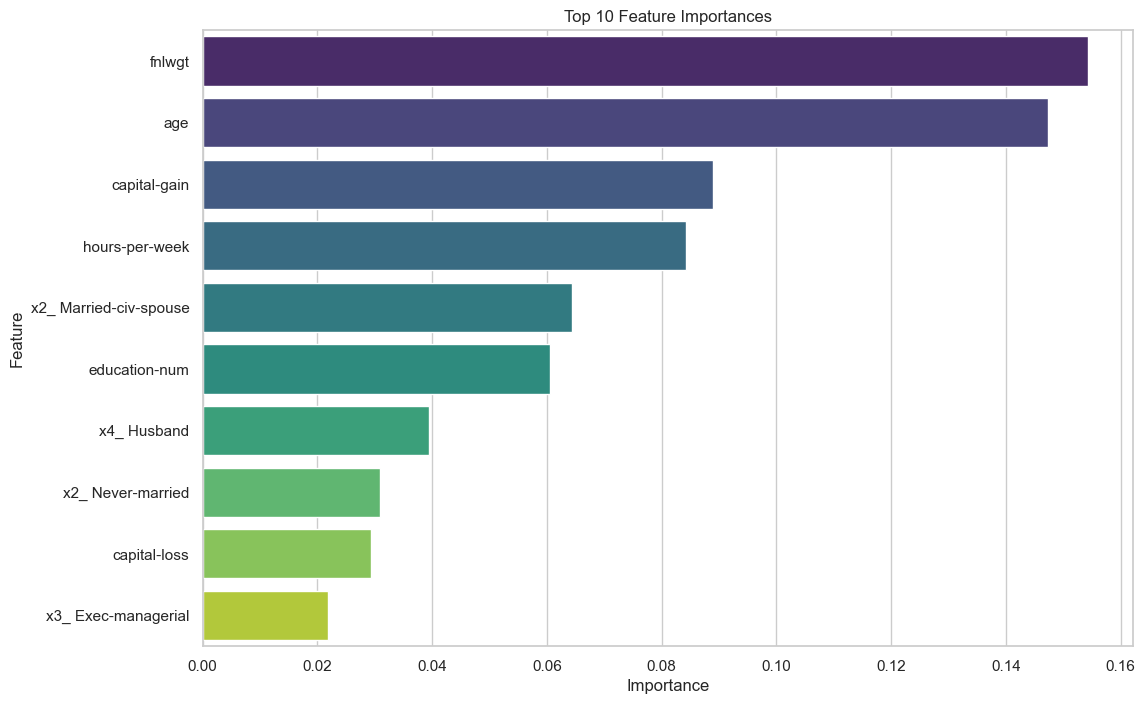

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 features
top_10_features_df = feature_importances_df.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features_df, palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



*Observation*: 
- We still don't know what "fnlwgt" means. This predictor certainly dominates, but it isn't a meaningful variable if we cannot interpret it. --> Therefore, my recommendation for further studies is to either remove this variable from the pipeline and modeling, or to find out what this variable means. 
- Ignoring 'fnlwgt', 'age' is the most dominant predictor, followed by 'capital gain' and 'hours working per week'. 'Marital status' and 'education' also play some influence. 


# DESCRIPTIVE STATISTICS 

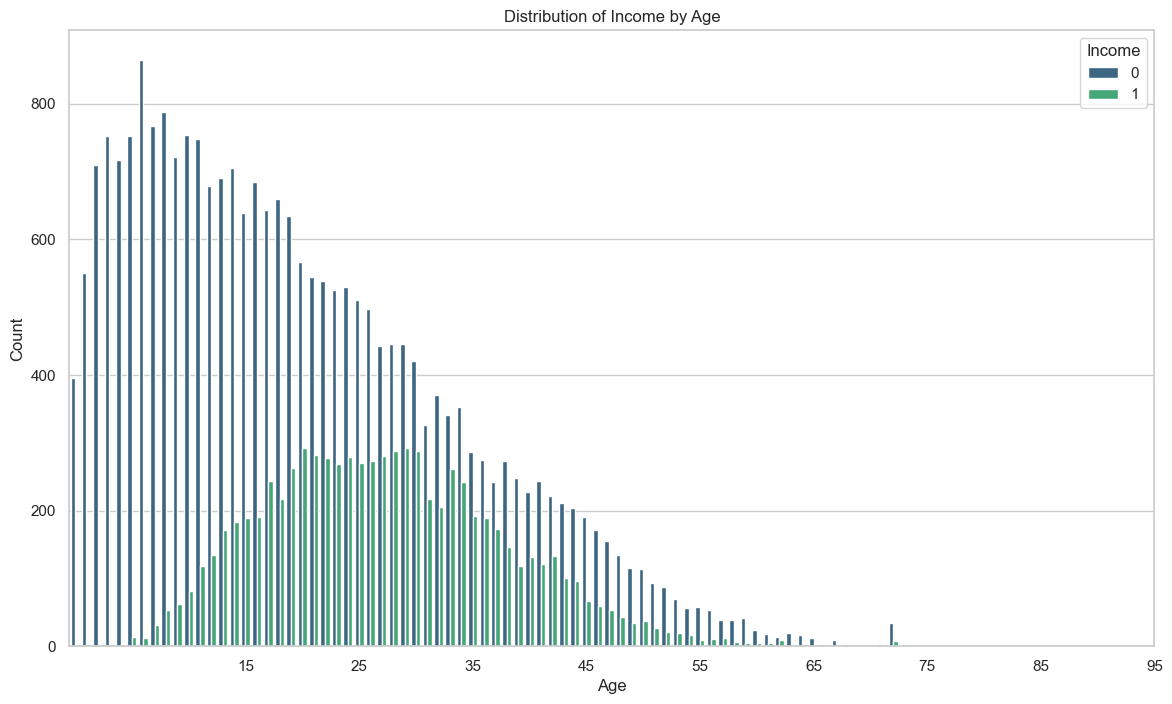

In [84]:
# Choose a top feature 
top_feature = 'age'

# Group by top feature and target (income), counting occurrences
income_distribution = adult_dt.groupby([top_feature, 'income']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=top_feature, y='Count', hue='income', data=income_distribution, palette='viridis')

# Set x-ticks to show every 10 years
plt.xticks(ticks=np.arange(15, 101, 10), labels=np.arange(15, 101, 10))

plt.title(f'Distribution of Income by {top_feature.capitalize()}')
plt.xlabel(top_feature.capitalize())
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


*Observation:*
- For low income group (<=50K), the age group below 30-years-old is more prevalent. 
- For higher income group (>50K), it seems to center between 20 to 30 years old. 

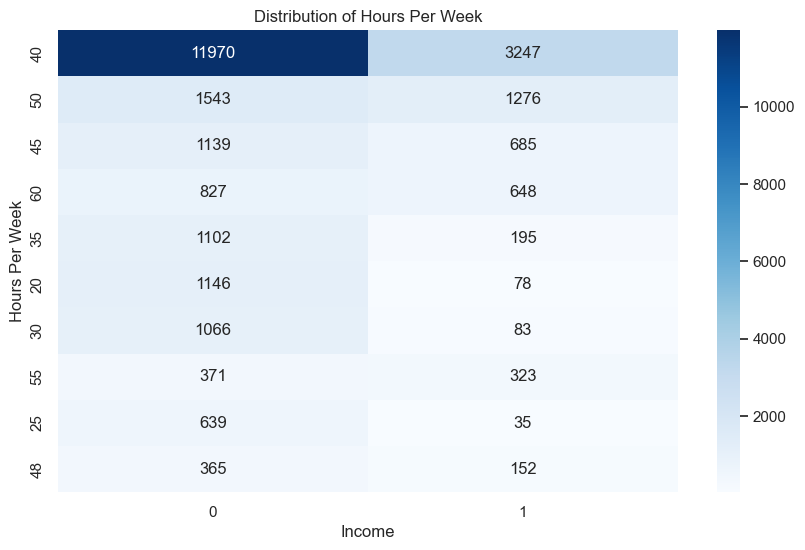

In [100]:
# Choose a top feature
top_feature = 'hours-per-week'

# Group by top feature and target (income), counting occurrences
income_distribution = adult_dt.groupby([top_feature, 'income']).size().unstack().fillna(0)

# Get the top 1 value for the top feature
top_values = income_distribution.sum(axis=1).nlargest(10).index

# Filter the data to include only the top 1 value
income_distribution_top_values = income_distribution.loc[top_values]

# Expand the numbers instead of using scientific notation
pd.options.display.float_format = '{:.0f}'.format

# Heatmap for Income Distribution by Top 1 Capital-Gain value
plt.figure(figsize=(10, 6))
sns.heatmap(income_distribution_top_values, annot=True, cmap='Blues', fmt='.0f')  # Use fmt='.0f' for integer formatting

plt.title('Distribution of Hours Per Week')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.show()


*Observation:*
- The count of working 40 hours per week dominates significantly in lowwer income group (<=50K), and is also significant in the higher income group (>50K). 

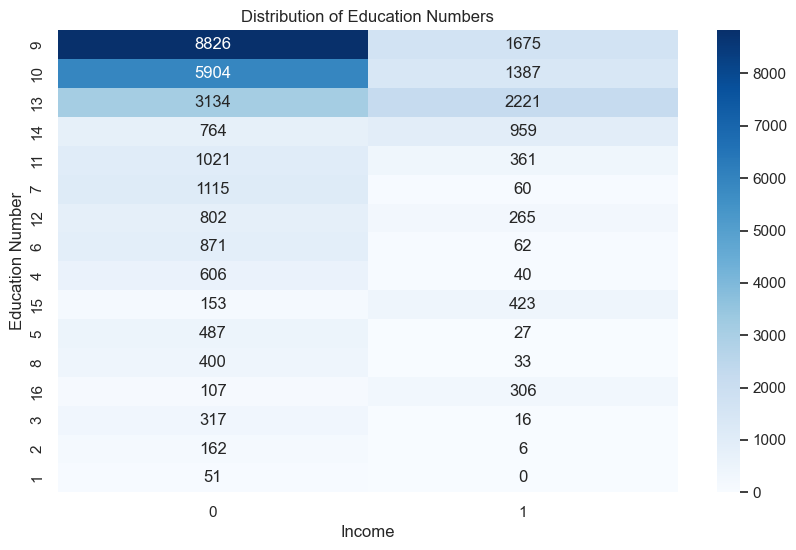

In [102]:
# Choose a top feature
top_feature = 'education-num'

# Group by top feature and target (income), counting occurrences
income_distribution = adult_dt.groupby([top_feature, 'income']).size().unstack().fillna(0)

# Get the top 1 value for the top feature
top_values = income_distribution.sum(axis=1).nlargest(20).index

# Filter the data to include only the top 1 value
income_distribution_top_values = income_distribution.loc[top_values]

# Expand the numbers instead of using scientific notation
pd.options.display.float_format = '{:.0f}'.format

# Heatmap for Income Distribution by Top 1 Capital-Gain value
plt.figure(figsize=(10, 6))
sns.heatmap(income_distribution_top_values, annot=True, cmap='Blues', fmt='.0f')  # Use fmt='.0f' for integer formatting

plt.title('Distribution of Education Numbers')
plt.xlabel('Income')
plt.ylabel('Education Number')
plt.show()


*Observation:*
- It is unclear what 'education-num' variable means. I assume it means the years a person spends in education. 
- For lower income group (<=50k), 9, 10 and 13 years in education have the most count. Whereas in the higher-income group, 13 - 16 years in education have the most counts. 
- This suggests investment in education pays off. But also, we need to be aware of the possibility of societal inequality where people who come from higher-income families are more able to be able to afford higher education (masters and PhD) and continual education investments.

# *IN SUMMARY:* 
- Our Predictive Model has a high scores across key evaluation metrics - negative log loss, accuracy, balance accuracy, ROC AUC. 
- The dataset has a lot of class imbalance, dominated by counts of lower income group (<=50K), white male, in America, married, and have high-school degrees as highest education. 
- We chose Random Forest with Robust Outlier and 'balance accuracy' as a performance metric to minimize the class imbalance. 
- We chose KNN Imputer with Robust Scaler to pre-process and transform numerical features, and Simple Imputer with One Hot Encoder to pre-process and transform categorical features. 
- We applied pipeline, used 5 folds cross validation, and chose Random Forest Classifer. 
- We did not apply hyperparameter tuning, as there's no need since the resulting Random Forest Classifier model as it has a high scores across key performance metrics.  
- The Random Forest's Feature Importance suggests that 'age' is the most influential predictor, followed by 'capital gain' and 'hours working per week'. 'Marital status' and 'years in education' also play minor influence. 

# Target Recoding

In the first code chunk of this document, we loaded the data and immediately recoded the target variable `income`. Why is this [convenient](https://scikit-learn.org/stable/modules/model_evaluation.html#binary-case)?

The specific line was:

```
adult_dt = (pd.read_csv('../05_src/data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1))
```

*MY ANSWER BELOW:*

- This code converts income group <= 50K as class 0, and >50K as class 1. 

- Since this variable is our chosen response variable, by doing this immediately after loading the data, we ensure the response variable is in a format that is consistent throughout for the analysis, evaluation, and modeling process. If we do the pre-processing later, there's more risk of format inconsistency and errors. 


## Criteria

The [rubric](./assignment_2_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.